# Support vector machines

In [1]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris = datasets.load_iris()
features = iris.data[:100, :2]
target = iris.target[:100]

In [3]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [4]:
svc = LinearSVC(C=1.0)
model = svc.fit(features_standardized, target)

In [5]:
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

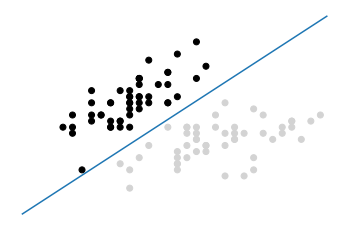

In [6]:
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]
plt.plot(xx, yy)
plt.axis("off")
plt.show

In [7]:
new_observation = [[-2, 3]]
svc.predict(new_observation)

array([0])

In [8]:
from sklearn.svm import SVC

In [9]:
np.random.seed(0)
features = np.random.randn(200, 2)

In [10]:
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

In [11]:
svc = SVC(kernel="rbf", random_state=42, gamma=1, C=1)
model = svc.fit(features, target)

In [12]:
from matplotlib.colors import ListedColormap

In [13]:
def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(["red", "blue"])
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker="+", label=cl)

In [14]:
svc_linear = SVC(kernel="linear", random_state=42, C=1)
svc_linear.fit(features, target)

SVC(C=1, kernel='linear', random_state=42)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


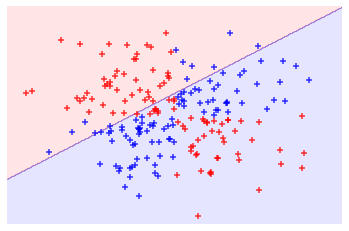

In [15]:
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


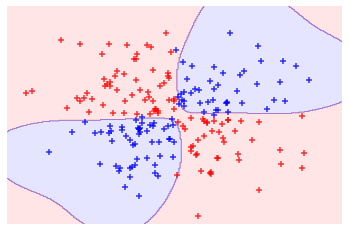

In [16]:
svc = SVC(kernel="rbf", random_state=42, gamma=1, C=1)
model = svc.fit(features, target)
plot_decision_regions(features, target, classifier=svc)
plt.axis("off")
plt.show()

In [17]:
features = iris.data
target = iris.target
features_standardized = scaler.fit_transform(features)

In [18]:
svc = SVC(kernel="linear", probability=True, random_state=42)
model = svc.fit(features_standardized, target)

In [19]:
new_observation = [[.4, .4, .4, .4]]
model.predict_proba(new_observation)

array([[0.00618046, 0.96119978, 0.03261976]])

In [20]:
features = iris.data[:100, :]
target = iris.target[:100]
features_standardized = scaler.fit_transform(features)

In [21]:
svc = SVC(kernel="linear", random_state=42)
model = svc.fit(features_standardized, target)
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

In [22]:
model.support_

array([23, 41, 57, 98])

In [23]:
model.n_support_

array([2, 2])

In [24]:
features = iris.data[:100, :]
target = iris.target[:100]
features = features[40:, :]
target = target[40:]
target = np.where((target == 0), 0, 1)
features_standardized = scaler.fit_transform(features)

In [25]:
svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=42)
model = svc.fit(features_standardized, target)